In [1]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt
import random

In [2]:
def find_colours(a,k):
    #find ranges
    quantized_sets=[a]
    
    while(len(quantized_sets)!=k):
        a=quantized_sets.pop(0)
        #print(a[0])
        r_span=max(a,key=lambda x:x[0])[0]-min(a,key=lambda x:x[0])[0]
        g_span=max(a,key=lambda x:x[1])[1]-min(a,key=lambda x:x[1])[1]
        b_span=max(a,key=lambda x:x[2])[2]-min(a,key=lambda x:x[2])[2]
        max_span=max(r_span,g_span,b_span)

        if(max_span==r_span):
            a=sorted(a,key=lambda x:x[0])

        elif(max_span==g_span):
            a=sorted(a,key=lambda x:x[1])

        else:
            a=sorted(a,key=lambda x:x[2])
        l,r=a[:int((len(a)+1)/2)],a[int((len(a)+1)/2):]
        a.pop()
        quantized_sets.append(l)
        quantized_sets.append(r)
    
    
    for i in range(k):
        a=quantized_sets.pop(0)
        d=dict()
        
        r=sum(x[0] for x in a) / len(a)
        g=sum(x[1] for x in a) / len(a)
        b=sum(x[2] for x in a) / len(a)
        for index,value in enumerate(list(set(a))):
            d[value] = [r,g,b]
        quantized_sets.append(d)
        
    return quantized_sets  

def transform_median_cut(img,k):
    img=np.array(cv2.imread(img),dtype=np.float32)
    l=img.shape[0]
    a=img.reshape((-1,3))
    a=[tuple(a[i,:]) for i in range(a.shape[0])]
    qs=find_colours(a,k)
    img=img.reshape((-1,3))
    for i in range(img.shape[0]):
        temp=img[i,:]
        if(i%10000==0):
            print(i)
        '''
        d=float('inf')
        for key in qs:
            
            
            d1=np.linalg.norm(key[-1]-temp)
            if(d1<d):
                d=d1
                v=key[-1]
            
        img[i,:]=v
        '''
        for key in qs:
            if(tuple(temp) in key):
                temp=key[tuple(temp)]
                break
   
        img[i,:]=temp
        
        
    img=img.reshape(l,-1,3)
    cv2.imwrite('median_cut_new.jpg', img)
    return img

from collections import Counter
def transform_popularity_algo(img,k):
    img=np.array(cv2.imread(img),dtype=np.float32)
    l=img.shape[0]
    a=img.reshape((-1,3))
    a=[tuple(a[i,:]) for i in range(a.shape[0])]
    
    top_colours=Counter(a)
    top_colours=sorted(top_colours.items(),key=lambda x:-x[1])[:k]
    #print(top_colours)
    top_colours=[np.array(x[0]) for x in top_colours]
    #img=img.reshape((-1,3))
    for i in range(img.shape[0]):
        if(i%50==0):
            print(i)
        for j in range(img.shape[1]):
            temp=img[i,j,:]
            
            d=sys.maxsize 
            v=0
            for t in top_colours:
                d1=np.linalg.norm(temp-t)
                if(d>d1):
                    d=d1
                    v=t
            img[i,j,:]=v
    
    cv2.imwrite('popularity_algo_new.jpg', img)
    return img


def med_cut_dithered(img,k):
    img=np.array(cv2.imread(img),dtype=np.float32)
    l=img.shape[0]
    b=img.shape[1]
    a=img.reshape((-1,3))
    a=[tuple(a[i,:]) for i in range(a.shape[0])]
    qs=find_colours(a,k)
    img=img.astype('float')
    for i in range(l):
        if(i%50==0):
            print(i)
        for j in range(b):
            temp=img[i,j,:]
            '''
            d=float('inf')
            for key in qs:
                d1=np.linalg.norm(key[-1]-temp)
                if(d1<d):
                    d=d1
                    v=key[-1]
            e=temp-v
            img[i,j,:]=v
            
            '''
            for key in qs:
                if(tuple(temp) in key):
                    temp=key[tuple(temp)]
                    break
            
            
            e=img[i,j,:]-temp
            img[i,j,:]=temp
            
            
            if(i+1<l):
                img[i+1,j,:]+=3/8*e
            if(j+1<b):
                img[i,j+1,:]+=3/8*e 
            if(j+1<b and i+1<l):
                img[i+1,j+1,:]+=1/4*e 
                
                
    cv2.imwrite('median_cut_dithered_new.jpg', img)
    return img


def popularity_dithered(img,k):
    img=np.array(cv2.imread(img,1),dtype=np.float32)
    l=img.shape[0]
    b=img.shape[1]
    a=img.reshape((-1,3))
    a=[tuple(a[i,:]) for i in range(a.shape[0])]
    top_colours=Counter(a)
    top_colours=sorted(top_colours.items(),key=lambda x:-x[1])[:k]
    top_colours=[np.array(x[0]) for x in top_colours]
    img=img.astype('float')
    for i in range(l):
        if(i%50==0):
            print(i)
        for j in range(b):
            temp=img[i,j,:]
            d=float('inf')    
            for t in top_colours:
                d1=np.linalg.norm(t-temp)
                if(d>d1):
                    d=d1
                    v=t
            e=temp-v
            img[i,j,:]=v
            
            if(i+1<l):
                img[i+1,j,:]+=3/8*e
                
            if(j+1<b):
                img[i,j+1,:]+=3/8*e 
            if(j+1<b and i+1<l):
                img[i+1,j+1,:]+=1/4*e
            #if(i+1<l and j>0):
             #   img[i+1,j-1,:]+=3/16*e
   
    cv2.imwrite('popularity_dithered_new.jpg', img)
    return img


In [3]:
img='img.jpeg'
#############################Median Cut########################################
mc=transform_median_cut(img,16)


0
10000
20000
30000
40000


Median Cut Algorithm with 16 Colours


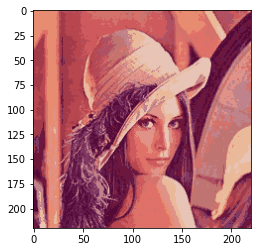

In [4]:
print("Median Cut Algorithm with 16 Colours")
plt.imshow(mc[:,:,::-1]/255)
plt.show()

In [5]:
# ################################Popularity Cut##############################
pc=transform_popularity_algo(img,64)

0
50
100
150
200


Popularity Algorithm with 64 Colours


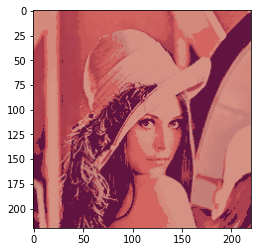

In [6]:
print("Popularity Algorithm with 64 Colours")
plt.imshow(pc[:,:,::-1]/255)
plt.show()


In [7]:
# ##########################################Popularity+Dithering###############
pd=popularity_dithered(img,64)

0
50
100
150
200


Popularity Algorithm + Dithering with 64 Colours


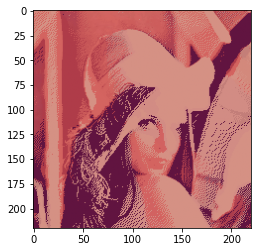

In [8]:
print("Popularity Algorithm + Dithering with 64 Colours")
plt.imshow(pd[:,:,::-1]/255)
plt.show()

In [9]:
# #################################MedianCut+Dithering#########################
md=med_cut_dithered(img,16)

0
50
100
150
200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Median Cut Algorithm + Dithering with 16 Colours


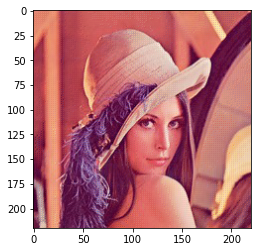

In [10]:
print("Median Cut Algorithm + Dithering with 16 Colours")
plt.imshow(md[:,:,::-1]/255)
plt.show()

In [11]:
##########PARTB######################

In [12]:
def lum_remapping(a,b):
    
    sigma_a=np.std(a[:,:,0])
    sigma_b=np.std(b)*100./255
    mean_a=np.mean(a[:,:,0])
    mean_b=np.mean(b)*100./255
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            p=a[i,j,0]
            a[i,j,0]=sigma_b/sigma_a*(p-mean_a)+mean_b
    return a

def stdfive(img,srca,srcb,gray_or_colour):
    top_row=max(0,srca-2)
    bottom_row=min(img.shape[0],srca+3)
    left_col=max(0,srcb-2)
    right_col=min(img.shape[1],srcb+3)
    if(gray_or_colour==0):
        m=img[top_row:bottom_row,left_col:right_col]
    else:
        m=img[top_row:bottom_row,left_col:right_col,0] #std of only Luminescence value is calculated in case of coloured

    return np.std(m.flatten())



def find_jittered_samples(source,k):
    '''k is the size of square window chosen i.e. k*k'''
    jittered_samples=[]

    for i in range(0,source.shape[0],k+1):
        for j in range(0,source.shape[1],k+1):
            if(((i+k)>=source.shape[0]) or ((j+k)>=source.shape[1])):
                break    
            m=source[i:i+k,j:j+k,:]
            rand_r,rand_c=random.randint(0,k-1),random.randint(0,k-1)
            randcolour=m[rand_r,rand_c,:]
            sd=stdfive(source,i+rand_r,j+rand_c,1)
            m=list(randcolour)
            m.append(0.5*randcolour[0]+0.5*sd)

            jittered_samples.append(m)
    return jittered_samples  

def colourize(js,img):
    l,b=img.shape
    l=int(l)
    b=int(b)
    
    target=np.ones((l,b,3))
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p=img[i][j]*100/255
            sd=stdfive(img,i,j,0)*100./255.
            val=0.5*(p+sd)
            d=float('inf')
            a,b=0,0
            for s in js:
                if(d>abs(s[3]-val)):
                    d=abs(s[3]-val)
                    a,b=s[1],s[2]
            target[i,j,:]=np.array([p,a,b]) 
    target=cv2.cvtColor(target.astype(np.float32), cv2.COLOR_Lab2BGR)
    target*=255.
    return target


def global_transfer(colour,grayscale):
    a=cv2.imread(colour,1)

    a = np.array(a,dtype=np.float32)
    b=cv2.imread(grayscale,0)
    b = np.array(b, dtype=np.float32)
    a*=1./255
    source=cv2.cvtColor(a, cv2.COLOR_BGR2Lab).astype(np.float32)
    source=lum_remapping(source,b)
    jittered_samples=find_jittered_samples(source,16)
    target=colourize(jittered_samples,b)
    
    return target

def colourize_target_swatches(s1_r,s1_c,s2_r,s2_c,s3_r,s3_c,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c,c_img,g_img):
    c_img=cv2.imread(c_img,1)
    c_img= np.array(c_img,dtype=np.float32)
    
    g_img=cv2.imread(g_img,0)
    g_img = np.array(g_img, dtype=np.float32)
    c_img*=1./255
    c_img=cv2.cvtColor(c_img, cv2.COLOR_BGR2Lab).astype(np.float32)
    s1=c_img[s1_r:s1_r+50,s1_c:s1_c+50,:]
    s3=c_img[s3_r:s3_r+50,s3_c:s3_c+50,:]
    s2=c_img[s2_r:s2_r+50,s2_c:s2_c+50,:]
    t1=g_img[t1_r:t1_r+50,t1_c:t1_c+50]
    t2=g_img[t2_r:t2_r+50,t2_c:t2_c+50]
    t3=g_img[t3_r:t3_r+50,t3_c:t3_c+50]
    s1=lum_remapping(s1,t1)
    s2=lum_remapping(s2,t2)
    s3=lum_remapping(s3,t3)
    js1=find_jittered_samples(s1,1)
    js2=find_jittered_samples(s2,1)
    js3=find_jittered_samples(s3,1)
    t1=colourize(js1,t1)
    t2=colourize(js2,t2)
    t3=colourize(js3,t3)
    return t1,t2,t3


def find_colour_channel(i,j,g_img,c_img,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c):
    top_row=max(0,i-2)
    bottom_row=min(c_img.shape[0],i+3)
    left_col=max(0,j-2)
    right_col=min(c_img.shape[1],j+3)
    neighbourhood=g_img[top_row:bottom_row,left_col:right_col]*100./255
    e=float('inf')
    l=bottom_row-top_row
    w=right_col-left_col
    a,b=0,0
    for r in range(t3_r,t3_r+l):
        for c in range(t3_c,t3_c+w):
            sample=c_img[r:r+l,c:c+w,0]
            d=np.linalg.norm(neighbourhood-sample)
            if(e>d):
                e=d
                a,b=c_img[r,c,1],c_img[r,c,2] 
    for r in range(t2_r,t2_r+l):
        for c in range(t2_c,t2_c+w):
            sample=c_img[r:r+l,c:c+w,0]
         
            d=np.linalg.norm(neighbourhood-sample)
            if(e>d):
                e=d
                a,b=c_img[r,c,1],c_img[r,c,2]
    for r in range(t1_r,t1_r+l):
        for c in range(t1_c,t1_c+w):
            sample=c_img[r:r+l,c:c+w,0]         
            d=np.linalg.norm(neighbourhood-sample)
            if(e>d):
                e=d
                a,b=c_img[r,c,1],c_img[r,c,2]
                
                
     
                
    return a,b


def colour_remaining_pixels(t1,t2,t3,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c,g_img):

    t1*=1/255.
    t1=cv2.cvtColor(t1.astype(np.float32), cv2.COLOR_BGR2Lab)
    t2*=1/255.
    t2=cv2.cvtColor(t2.astype(np.float32), cv2.COLOR_BGR2Lab)
    t3*=1/255.
    t3=cv2.cvtColor(t3.astype(np.float32), cv2.COLOR_BGR2Lab)
    target=np.ones((g_img.shape[0],g_img.shape[1],3))
    target[:,:,0]=g_img[:,:]*100./255
    target[t1_r:t1_r+50,t1_c:t1_c+50,:]=t1
    target[t2_r:t2_r+50,t2_c:t2_c+50,:]=t2
    target[t3_r:t3_r+50,t3_c:t3_c+50,:]=t3
    
    
    '''
    temp=cv2.cvtColor(target.astype(np.float32), cv2.COLOR_Lab2BGR)
    temp*=255.
    cv2.imwrite('temp.jpg',temp)
    return
    
    print(target[0,140:210,0])
    print(g_img[0,140:210])
    '''
    for i in range(g_img.shape[0]):
        if(i%50==0):
            #print(i)
        for j in range(g_img.shape[1]):
            if (t1_r<=i<t1_r+50 and t1_c<=j<t1_c+50) or (t2_r<=i<t2_r+50 and t2_c<=j<t2_c+50) or (t3_r<=i<t3_r+50 and t3_c<=j<t3_c+50):
                continue
            target[i,j,1],target[i,j,2]=find_colour_channel(i,j,g_img,target,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c)
                
    
    
    target=cv2.cvtColor(target.astype(np.float32), cv2.COLOR_Lab2BGR)*255.
    return target 

def swatch_transfer(s1_r,s1_c,s2_r,s2_c,s3_r,s3_c,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c,c_img,g_img):
    t1,t2,t3= colourize_target_swatches(s1_r,s1_c,s2_r,s2_c,s3_r,s3_c,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c,c_img,g_img)
    b=np.array(cv2.imread(g_img,0),dtype=np.float32)
    target=colour_remaining_pixels(t1,t2,t3,t1_r,t1_c,t2_r,t2_c,t3_r,t3_c,b)
    cv2.imwrite('swatch_transfer_new.jpg',target)
    return target
    

In [13]:
#Global Transfer 

gt1=global_transfer('Colour.png','Grayscale.png')



gt2=global_transfer('ant_colour.png','ant_gray.png')

cv2.imwrite('global_transfer_ant_new.jpg',gt2)
cv2.imwrite('global_transfer_scenery_new.jpg',gt1)
# cv2.imshow("img", gt1/255.); cv2.waitKey(0); cv2.destroyAllWindows()
# cv2.imshow("img", gt2/255.); cv2.waitKey(0); cv2.destroyAllWindows()



True

Colour Image Used


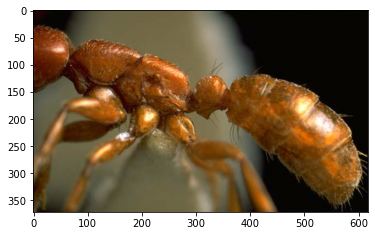

Grayscale Image to be Coloured


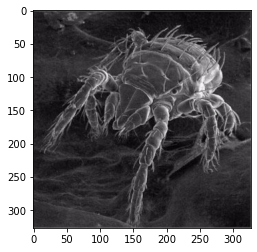

Coloured Image using Global Transfer


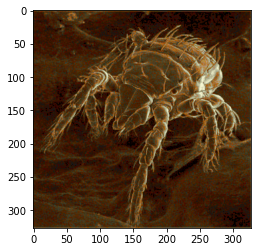

In [14]:
print("Colour Image Used")
plt.imshow(cv2.imread("ant_colour.png",1)[:,:,::-1]/255)
plt.show()

print("Grayscale Image to be Coloured")
plt.imshow(cv2.imread("ant_gray.png",1)[:,:,::-1]/255)
plt.show()

print("Coloured Image using Global Transfer")
plt.imshow(gt2[:,:,::-1]/255)
plt.show()

Colour Image Used


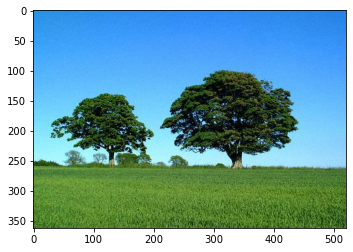

Grayscale Image to be Coloured


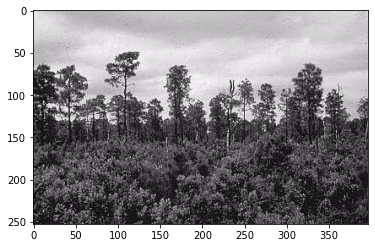

Coloured Image using Global Transfer


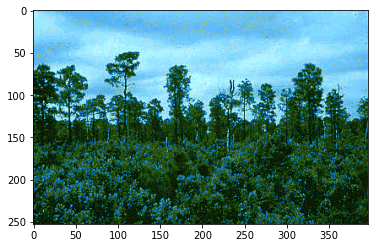

In [15]:
print("Colour Image Used")
plt.imshow(cv2.imread("Colour.png",1)[:,:,::-1]/255)
plt.show()

print("Grayscale Image to be Coloured")
plt.imshow(cv2.imread("Grayscale.png",1)[:,:,::-1]/255)
plt.show()

print("Coloured Image using Global Transfer")
plt.imshow(gt1[:,:,::-1]/255)
plt.show()

In [16]:
##############################Swatch Transfer###################################
st=swatch_transfer(0,0,75,270,312,0,0,150,70,100,183,10,'Colour.png','Grayscale.png')
#cv2.imshow("img", st/255.); cv2.waitKey(0); cv2.destroyAllWindows()

0
50
100
150
200
250


Coloured Image using Swatch Transfer


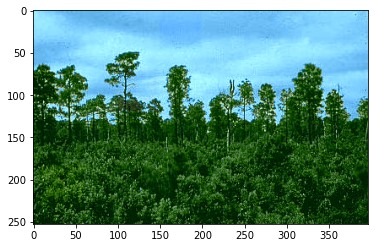

In [17]:
print("Coloured Image using Swatch Transfer")
plt.imshow(st[:,:,::-1]/255)
plt.show()